- At this notebook we are going to show there is double start token where added during fine-tuning phase for TrOCR
- Important to note here we dont show any comprassion or test for CER aas we are focausing on techical part to solve some issues we found and may be those models could give better results 

In [28]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import torch , random , requests
from io import BytesIO
from PIL import Image
import pandas as pd 
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer
torch.cuda.is_available()

True

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no help

# To copy only split set from  DH-Lab data

## The Data set we are using for inference here is Test set for [DH-Lab](https://huggingface.co/datasets/AlhitawiMohammed22/DH-Lab_lines) with 25 samples collected 

In [32]:
working_dir = '/content/gdrive/MyDrive/thesis/inference/'
train_text = f'{working_dir}inference.jsonl'
def load_jsonl():
    return pd.read_json(
                        path_or_buf = train_text,
                        lines=True,
                        )
train_text

'/content/gdrive/MyDrive/thesis/inference/inference.jsonl'

In [33]:
df = load_jsonl()
print(f'length of df : {len(df)} \n',df.head())

length of df : 325 
   file_name                                               text
0     1.jpg  ha jól emlékszem a télen és dicsérte, hogy milyen
1     2.jpg       finom. Én is csak ezt tudom tenni. Ha láttok
2     3.jpg  ilyen fűszerkeveréket próbáljátok ki, megéri. ...
3     4.jpg  maga a tésztája is nagyon finom. Bejegyezte: H...
4     5.jpg  szerda, augusztus 21, 2013 20 megjegyzés Címké...


##-  Get Model , Processor and Tokenizer (Optional)

In [34]:
def get_model(repo_id) :
    processor = TrOCRProcessor.from_pretrained(f'AlhitawiMohammed22/{repo_id}')          
    model = VisionEncoderDecoderModel.from_pretrained(f'AlhitawiMohammed22/{repo_id}')   
    use_tokenizer = False
    if use_tokenizer :
      tokenizer =  AutoTokenizer.from_pretrained(f'AlhitawiMohammed22/{repo_id}')        
    return model ,processor # , tokenizer

## Convert Image to Text

In [35]:
def I2T(model ,processor,image ,tokenizer = None):
  pixel_values = processor(images=image, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)

  if tokenizer is not None:
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
  else: 
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

In [36]:
use_tokenizer = False
source_imags_path = f'{working_dir}images/' 
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 

# 1 - TrOCR large 

In [37]:
trocr_large_model_ids = ['trocr_large_dhl_lines', 
                         'trocr_large_dhlab_aug_lines', 
                         'trocr_base_dhlab_lines ', 
                         'trocr_large_hu_lines_v2_2',  
                         'trocr_large_lines_v2_1_ft_on_dh-lab' , #  best last ckp !
                         'trocr_large_lines_v2_1_ft_on_dh-lab_aug' ,
                         'trocr_large_words_hu_dict', 
                        ]

## 1.1- TrOCR large Pre-trained on Synthetic words 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated text : Arqueérdmébey
Ground truth  :  iran érdemében 



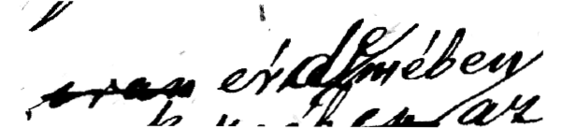

In [38]:
repo_id = trocr_large_model_ids[-1]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 1.2- TrOCR large Pre-trained on Synthetic lines 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (102) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated text : Maraevon. Lüsz tüléssel
Ground truth  :  Maradván tisztelettel 



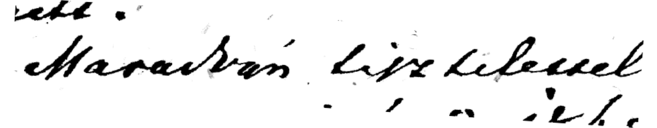

In [39]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = trocr_large_model_ids[3]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 1.3- TrOCR large Fine-tuned on Humman lines 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Generated text : lencsevégre kapni, ilyen réleges volt. Könnyed, üdítő lorla volt.
Ground truth  :  lencsevégre kapni, ilyen réteges volt. Könnyed, üdítő torta volt, 



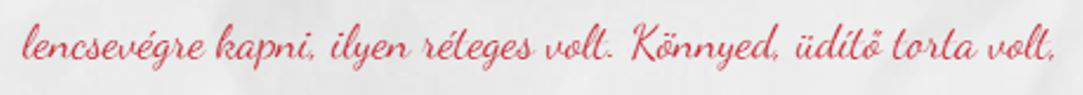

In [40]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = trocr_large_model_ids[4]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

# 2 - Roberta-base-Deit Inference 

In [41]:
roberta_base_deit_model_ids = ['Roberta-base-Deit_hu_lines_v2',
                               'Roberta-base-Deit_ft_DH-Lab_on_ckp_v2_1',
                               'Roberta-base-Deit_ft_DH-Lab_aug_on_ckp_v2_1', # the best 
                               'Roberta-base-Deit_hu_Words',
                              ]

## 2.1 - Pre-trained on Synthetic words

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated text : Sádababalaromézép
Ground truth  :  meghallgatása után, e tárgy- 



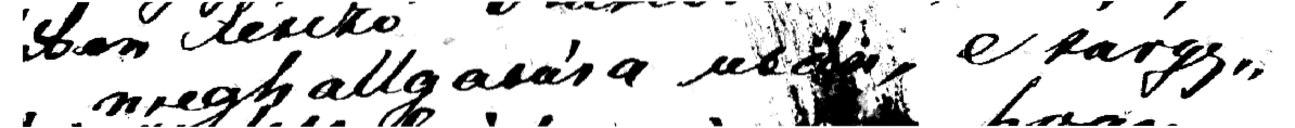

In [42]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = roberta_base_deit_model_ids[3]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 2.2 - Pre-trained on Synthetic lines

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (112) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated text : Emegerővédelmi néged
Ground truth  :  megerősités végett 



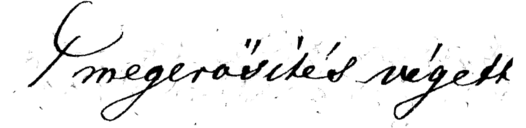

In [43]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = roberta_base_deit_model_ids[0]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 2.3 Fine-tuned on Humman data

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Generated text : történeti kincsek gondos meg-
Ground truth  :  történeti kincsek gondos meg- 



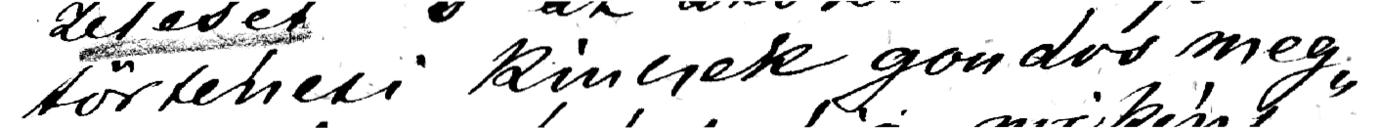

In [44]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = roberta_base_deit_model_ids[2] # best 
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

# 3 -  PULI-Bert with Deit model 

In [45]:
puli_diet_model_ids = [ 'PULI-Deit_lines_hu_v2_1',
                        'PULI-Deit_DH-Lab_ft_on_lines_hu_v2_1',
                        'PULI-Deit_DH-Lab_aug_ft_on_lines_hu_v2_1', # best 
                        'PULI_Deit_words_hu_dict',
                      ]

## 3.1 Pre-trained on Synthetic words 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Generated text : kulonbol
Ground truth  :  űléséből. 



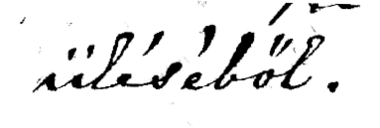

In [46]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = puli_diet_model_ids[-1]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 3.2 Pre-trained on Synthetic lines 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (96) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated text : gibb ". " exaggering the mobs, comen her he,
Ground truth  :  gibb számlájának most ujonnan be- 



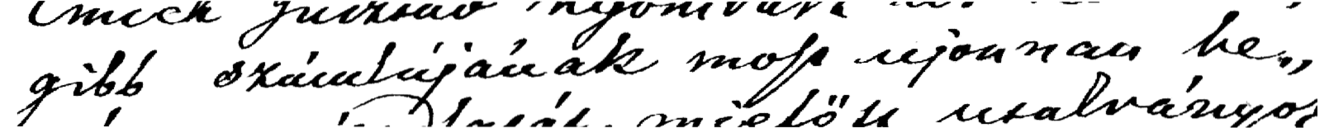

In [47]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = puli_diet_model_ids[0]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

## 3.3 Fine-tuned on Humman lines 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Generated text : a magyar tudomanyos akademi -
Ground truth  :  A Magyar Tudományos Akademi- 



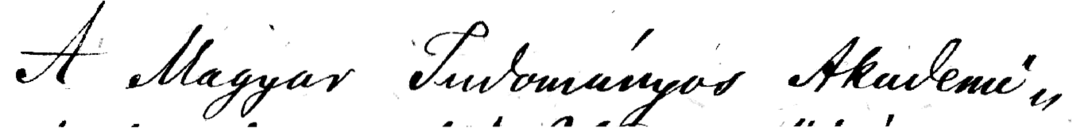

In [48]:
idx = random.randint(0,len(df))
image = Image.open(source_imags_path + df['file_name'][idx]).convert("RGB") 
repo_id = puli_diet_model_ids[2]
model,  processor  = get_model(repo_id)  
generated_text = I2T(model ,processor,image)
print(f'Generated text : {generated_text}')
print("Ground truth  : ",df['text'][idx],'\n')
image

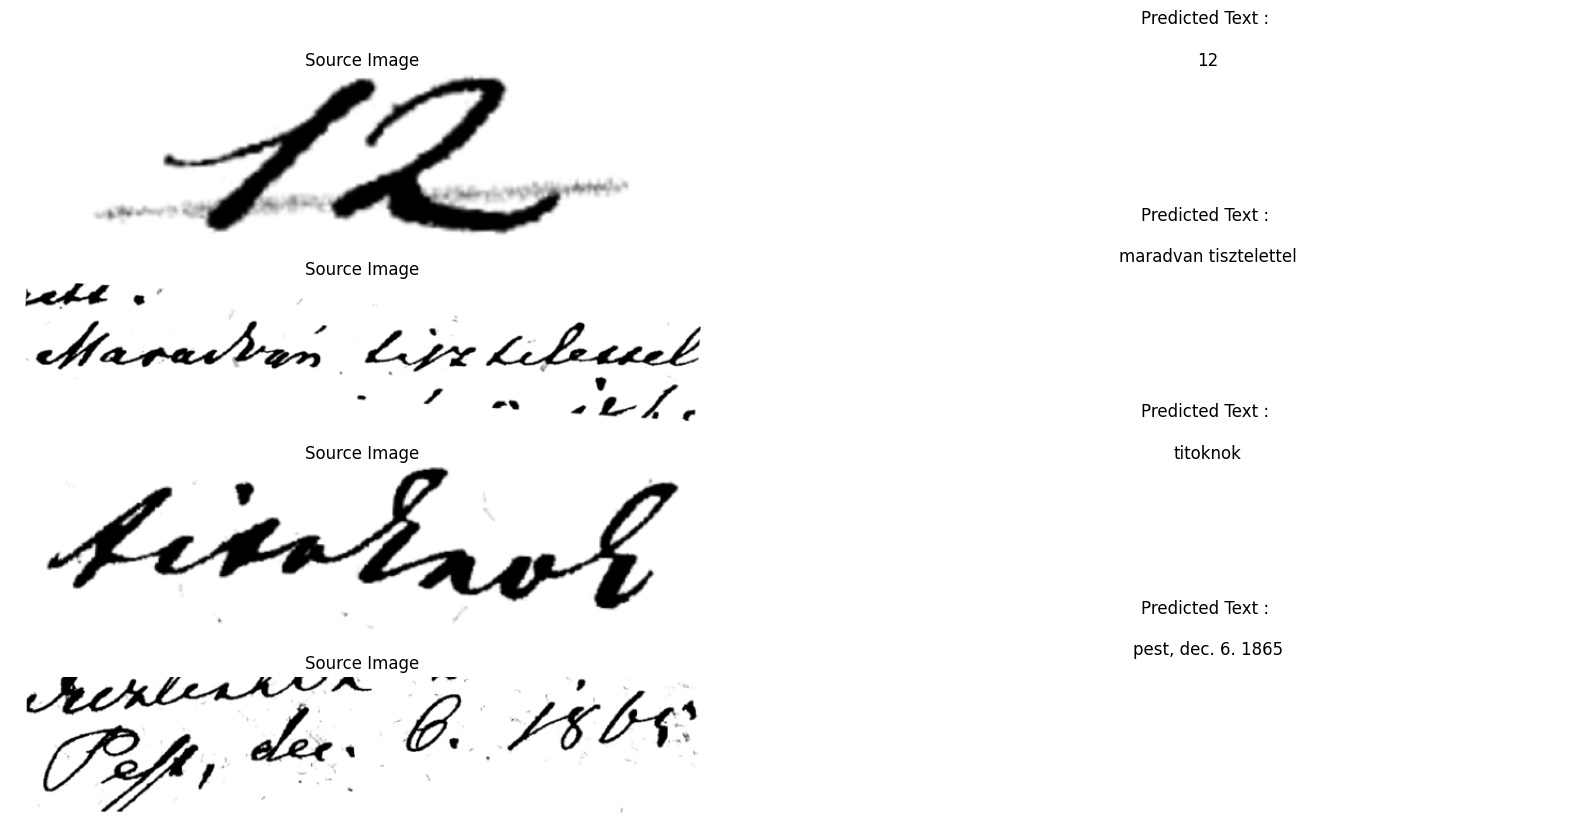

In [49]:
# take sample and do pridction 
sample_amount =  8
# to do choose randomly
idx1 = random.randint(0,len(df))
idx2 = random.randint(0,len(df))
idx3 = random.randint(0,len(df))
idx4 = random.randint(0,len(df))

image1 = Image.open(source_imags_path + df['file_name'][idx1]).convert("RGB")
image2 = Image.open(source_imags_path + df['file_name'][idx2]).convert("RGB")
image3 = Image.open(source_imags_path + df['file_name'][idx3]).convert("RGB")
image4 = Image.open(source_imags_path + df['file_name'][idx4]).convert("RGB")
plt.figure(figsize=(20,20))
i = 1
plt.subplot(sample_amount, 2, i).imshow(image1)
plt.subplot(sample_amount, 2, i).set_title('Source Image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
# plt.subplot(sample_amount, 2, i + 1).imshow(image2text(image1))

plt.subplot(sample_amount, 2, i + 1).set_title(f'Predicted Text : \n\n{I2T(model ,processor,image1)}')
# plt.subplot(sample_amount, 2, i + 1).set_title( df['text'][idx1] )
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 3
plt.subplot(sample_amount, 2, i).imshow(image2)
plt.subplot(sample_amount, 2, i).set_title('Source Image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
# plt.subplot(sample_amount, 2, i + 1).imshow(image2text(image2))
plt.subplot(sample_amount, 2, i + 1).set_title(f'Predicted Text : \n\n{I2T(model ,processor,image2)}')
plt.subplot(sample_amount, 2, i + 1).set_axis_off()
i = 5
plt.subplot(sample_amount, 2, i).imshow(image3)
plt.subplot(sample_amount, 2, i).set_title('Source Image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
# plt.subplot(sample_amount, 2, i + 1).imshow(image2text(image3))
plt.subplot(sample_amount, 2, i + 1).set_title(f'Predicted Text : \n\n{I2T(model ,processor,image3)}')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 7
plt.subplot(sample_amount, 2, i).imshow(image4)
plt.subplot(sample_amount, 2, i).set_title('Source Image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
# plt.subplot(sample_amount, 2, i + 1).imshow(image2text(image4))
plt.subplot(sample_amount, 2, i + 1).set_title(f'Predicted Text : \n\n{I2T(model ,processor,image4)}')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 